A --> motos
el resto coches... quiza deberiamos hacer algo distinto para las motos!!!
Hay coches amarillos que no están en el dataset, por ejemplo!

In [ ]:
from dl_model_unet import dataset
from dl_model_unet.tf_unet import unet

In [7]:
#reload(dataset)

import numpy as np
import pandas as pd

max_shape = 572
test_images = 10
bsize = 5

labels_data = pd.read_csv('data/trainingObservations.csv')
data = dataset.get_labels(labels_data, {'A':'Moto', 'B':'Car', 'C':'Car', 'D':'Car', 'E':'Car', 'F':'Car', 'G':'Car', 'H':'Car', 'I':'Car'})    

cases = list(data.keys())
np.random.shuffle(cases)
train_cases, test_cases = cases[test_images:], cases[:test_images]
train_generator = dataset.chunk(train_cases, data, bsize, max_shape)
test_generator = dataset.chunk(test_cases, data, bsize, max_shape)

for x,y in train_generator:
    break

/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


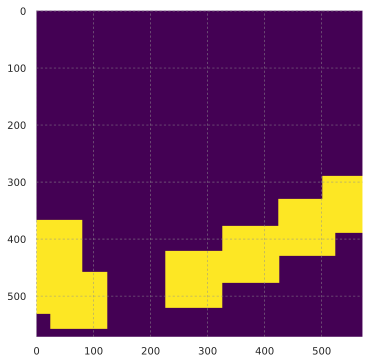

In [8]:
from pylab import *
imshow(y[0,:,:,0])

# Networks

In [ ]:
net = unet.Unet(channels=3, n_class=2, layers=3, features_root=16)
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))
path = trainer.train(train_generator, "./data/unet_trained", training_iters=20, epochs=10, display_step=2)

2017-04-06 19:09:54,422 Layers 3, features 16, filter size 3x3, pool size: 2x2
2017-04-06 19:09:56,089 Removing '/fjord/notebooks/joseal/compproj/cars/prediction'
2017-04-06 19:09:56,092 Removing '/fjord/notebooks/joseal/compproj/cars/data/unet_trained'
2017-04-06 19:09:56,094 Allocating '/fjord/notebooks/joseal/compproj/cars/prediction'
2017-04-06 19:09:56,095 Allocating '/fjord/notebooks/joseal/compproj/cars/data/unet_trained'
2017-04-06 19:10:03,505 Verification error= 9.4%, loss= 0.6796
2017-04-06 19:10:04,401 Start optimization
2017-04-06 19:10:21,407 Iter 0, Minibatch Loss= 0.4979, Training Accuracy= 0.9718, Minibatch error= 2.8%
2017-04-06 19:10:51,860 Iter 2, Minibatch Loss= 0.1935, Training Accuracy= 0.9642, Minibatch error= 3.6%
2017-04-06 19:11:21,678 Iter 4, Minibatch Loss= 0.0947, Training Accuracy= 0.9777, Minibatch error= 2.2%
2017-04-06 19:11:51,702 Iter 6, Minibatch Loss= 0.0668, Training Accuracy= 0.9878, Minibatch error= 1.2%
2017-04-06 19:12:21,588 Iter 8, Minibatch

In [12]:
for x_test, y_test in test_generator:
    prediction = net.predict("./data/unet_trained/model.cpkt", x_test)
    break

2017-04-07 00:54:31,179 Model restored from file: ./data/unet_trained/model.cpkt


/usr/local/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


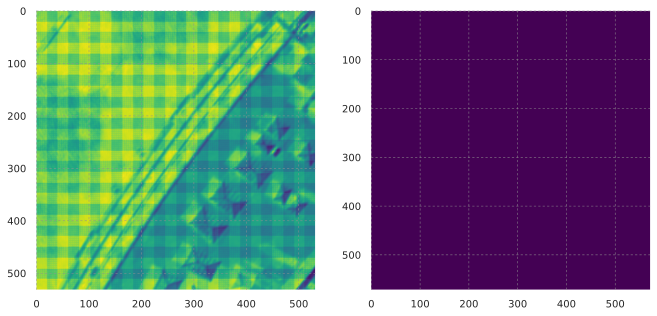

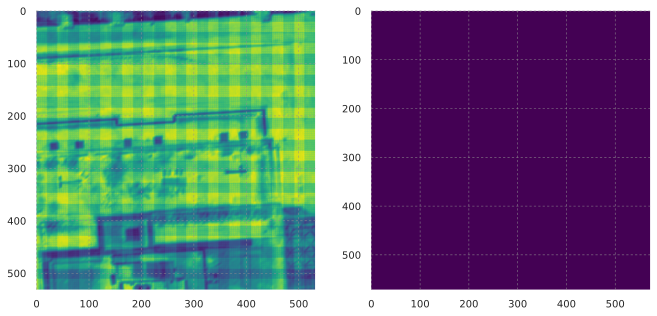

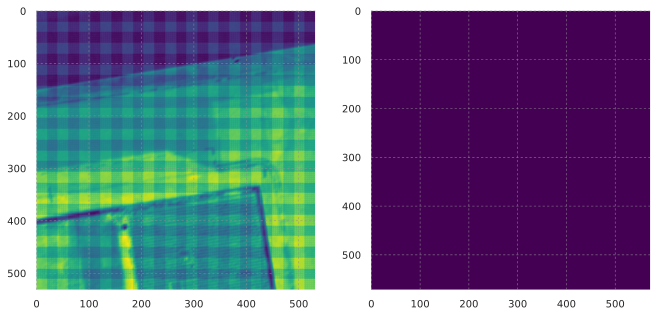

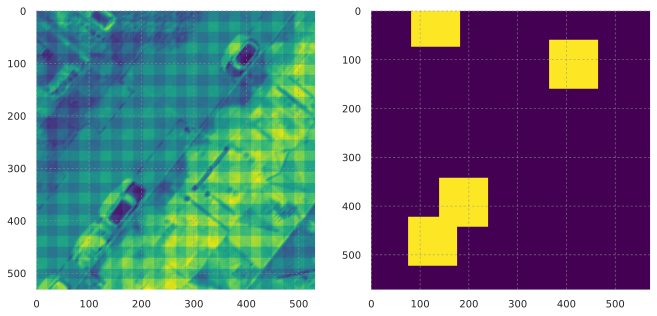

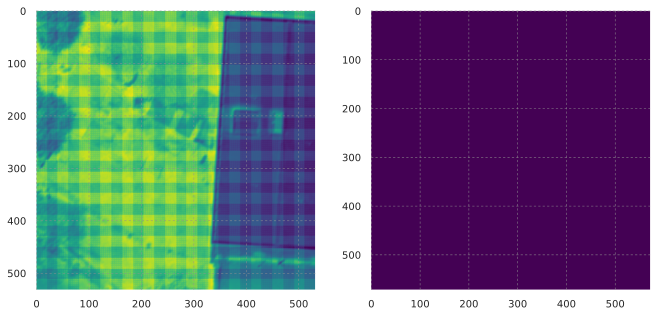

In [19]:
for i in range(y_test.shape[0]):
    figure()
    subplot(121)
    imshow(prediction[i,...,0])
    subplot(122)
    imshow(y_test[i,...,0])

In [ ]:
from dl_model_unet.tf_unet import image_gen

a = image_gen.RgbDataProvider(512,512)
a._next_data()[0].shape, a._next_data()[1].shape

In [ ]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")
mask = prediction[0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()
fig.savefig(".data/docs/toy_problem.png")